**Importing Libraries and Loading the Data**

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
# print(data.head())
data

,Timestamp,What is your current level of education?,What is your gender?,Do you watch Hollywood Movies?,What is the last Hollywood film you watched?,"Where did you watch this film? (If cinema, specify the cinema in 'Other')",Rate this Film,Would you watch a similar film in the future? (Same Genre),What is your favourite Hollywood movie of all time? (Choose one),"Who is your favourite actor/actress of all time? (Hollywood, choose one)",Gender of favourite Actor,"Which one film of theirs, did you like the most?",Recent Movie Genre,Favourite Movie Genre,Favourite Actor Movie Genre
0,18/10/2023 20:34:48,University,Male,Yes,Gran turismo,Cinepax (packages),4,No,Avengers: Endgame,Robert downey jr,Male,Avengers,Action,Action,Action
1,18/10/2023 21:07:17,University,Male,Yes,Blue Beetle,Website/Torrent,3,Yes,Shutter Island,Hugh Jackman,Male,Wolverine,Action,Thriller,Action
2,18/10/2023 22:49:42,University,Male,Yes,oppenhiemer,cue cinemas,4,Yes,inception,tom cruise,Male,vanilla sky,thriller,Action,Thriller
3,18/10/2023 22:57:21,University,Female,Yes,A rainy day in newyork,Website/Torrent,4,Yes,End Game,Tom Hiddleston,Male,I saw the light,romance,Action,Drama
4,18/10/2023 22:57:44,University,Female,Yes,Exorcist,Cinema,3,Yes,10 things i hate about you,Ryan reynolds,Male,Deadpool,horror,Romance,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,22/10/2023 22:55:28,School (Till Matric/O-Levels),Female,Yes,Mission impossible 7,Cinestar IMAX,5,Yes,Avengers end game,Tom cruise,Male,Mission impossible 9,action,Action,Action
150,22/10/2023 23:08:28,Not a Student,Male,Yes,The Ugly Truth,Netflix,5,Yes,The Proposal,Kate Winslet,Female,Titanic,romance,Romance,Romance
151,23/10/2023 02:00:00,University,Male,Yes,The whale,Website/Torrent,4,Yes,Fight Club,Colin Farrell,Male,The lobster,drama,Action,Romance
152,23/10/2023 15:47:00,University,Female,Yes,Remember me,Website/Torrent,3,Yes,Jurassic Park,Keanu Reeves,Male,John Wick 4,romance,Action,Action


**Rename All columns from questions to appropriate column names**

In [157]:
#firstly, removing the timestamps column as it is unnecesary
data = data.drop(['Timestamp'], axis=1)

#then, dropping the null values
data.dropna(inplace=True)

#renaming columns to make sense
data = data.rename(columns={
    "What is your current level of education?" : "Education",
    "What is your gender?" : "Gender",
    "Do you watch Hollywood Movies?": "Watches Hollywood Movies",
    "What is the last Hollywood film you watched?": "Recently Watched",
    "Where did you watch this film? (If cinema, specify the cinema in 'Other')" : "Platform",
    "Rate this Film": "Recent Rating",
    "Would you watch a similar film in the future? (Same Genre)": "Watch Again",
    "What is your favourite Hollywood movie of all time? (Choose one)" : "Favourite Movie",
    "Who is your favourite actor/actress of all time? (Hollywood, choose one)" :  "Favourite Actor",
    "Gender of favourite Actor" : "Favourite Actor Gender",
    "Which one film of theirs, did you like the most?" : "Favourite Actor Movie"
})

# print(data)

**Convert all string columns to lower case**

In [158]:

data = data.applymap(lambda x: x.lower() if type(x) == str else x)

/var/folders/h1/49stt73n6n7ch55lsp5m2zsc0000gn/T/ipykernel_76166/3233072497.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.lower() if type(x) == str else x)


**Correcting typos**

In [159]:

def correct_typos(entry):
    
    if entry == 'openheimer' or entry == 'openheimer':
        return 'oppenheimer'
    elif entry == 'end game' or entry == 'infinity war':
        print('changed2')
        return 'Avengers'
    else:
        return entry
    
data['Favourite Movie'] = data['Favourite Movie'].apply(correct_typos)
data['Recently Watched'] = data['Recently Watched'].apply(correct_typos)
data['Favourite Actor Movie'] = data['Favourite Actor Movie'].apply(correct_typos)


changed2
changed2


**Drawing Inferences From The Data**

Unique genders are:  ['male' 'female' 'confused']
It can be seen that there is junk data in the dataset, so removing that.
new unique column values are: 
['male' 'female']


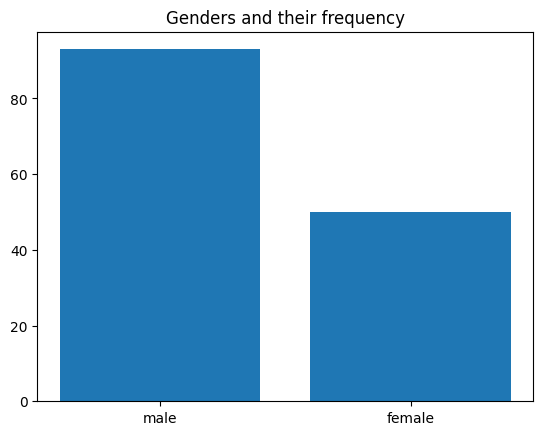

In [160]:
#get unique values of gender column
uniqueGender = data["Gender"].unique()
print("Unique genders are: ", uniqueGender)
print("It can be seen that there is junk data in the dataset, so removing that.")
data = data[(data['Gender'] != 'confused') & (data['Gender'] != 'attack helicopter')]
print("new unique column values are: ")
uniqueGender = data["Gender"].unique()
values = data["Gender"].value_counts()
print(uniqueGender)
# print(values)
#plot the values and their frequency:
plt.bar(uniqueGender, values)
plt.title("Genders and their frequency")
plt.show()



**Observation 1:**
In our dataset, there are more males than females, this could be because males are more comfortable in participating in surveys as compared to females.

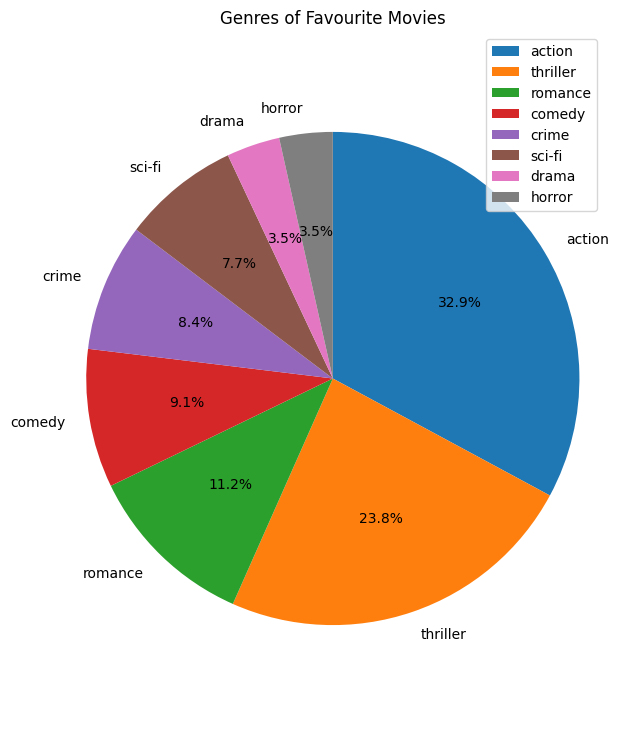

In [161]:
uniqueGenres = data["Favourite Movie Genre"].unique()
valueFavGenre = data["Favourite Movie Genre"].value_counts()

plt.figure(figsize = (7,9))
plt.pie(valueFavGenre, labels = uniqueGenres, autopct = '%1.1f%%', startangle = 90, counterclock = False)

plt.axis('equal')

plt.title("Genres of Favourite Movies")
plt.legend()

plt.show()

**Observation 2:**
The number of favourite movies with genres action and thriller are more than other genres. this could be because our dataset is almost 2/3 males (2nd research question based on this)

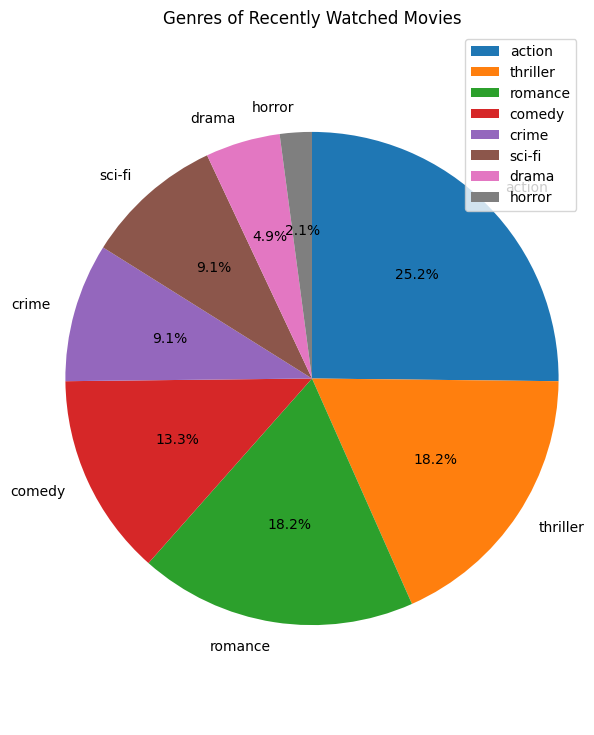

In [162]:
RecentGenres = data["Recent Movie Genre"].unique()
valueRecentGenre = data["Recent Movie Genre"].value_counts()

plt.figure(figsize = (7,9))
plt.pie(valueRecentGenre, labels = uniqueGenres, autopct = '%1.1f%%', startangle = 90, counterclock = False)

plt.axis('equal')

plt.title("Genres of Recently Watched Movies")
plt.legend()

plt.show()

**Observation 3:**
The top 3 genres (romance, thriller and action) are the same for both favourite movies and recently watched movies, implying that students tend to watch similar movies from their favourite genre. (1st research question based on this)

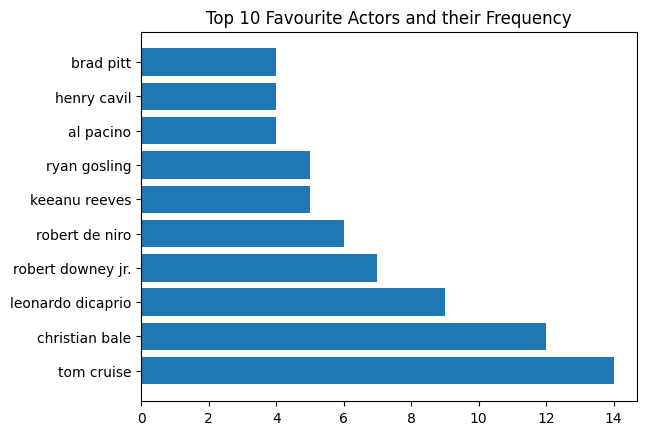

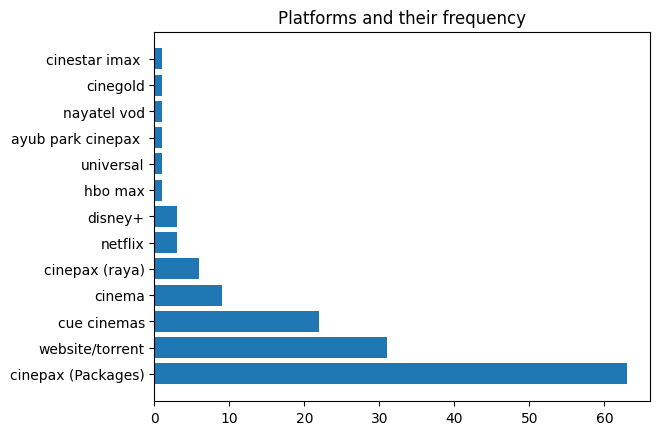

In [163]:
Platforms = data["Platform"].unique()
# print("Unique platforms are: ", Platforms)
# print("There are a lot of repeat entries and spacing errors, so cleaning it: ")
#firstly, cleaning this platforms column to make a bit more sense:
data['Platform'] = data['Platform'].replace(['cinema', 'cinema ', 'cinema'], 'cinema')
data['Platform'] = data['Platform'].replace(['cinepax',  'cinepax (packages)',  'packages mall cinema'], 'cinepax (Packages)')
data['Platform'] = data['Platform'].replace(['cinepax raya', 'raya cinema'], 'cinepax (raya)')
data['Platform'] = data['Platform'].replace(['cue cinemas', 'cue', 'cue cinema', 'cue cinema '], 'cue cinemas')


data["Favourite Actor"] = data["Favourite Actor"].replace(['robert downey jr', 'robert downey jr.', 'rdj', 'robert downey junior'], 'robert downey jr.')
data["Favourite Actor"] = data["Favourite Actor"].replace(['tom cruise ', 'tom cruise'], 'tom cruise')
data["Favourite Actor"] = data["Favourite Actor"].replace(['de niro', 'robert de niro'], 'robert de niro')
data["Favourite Actor"] = data["Favourite Actor"].replace(['leonardio de caprio ', 'leonardo de caprio', 'dicaprio', 'leonardio de caprio'], 'leonardo dicaprio')
data["Favourite Actor"] = data["Favourite Actor"].replace(['jake gyllenhall', 'jake gyllenhaal'], 'jake gyllenhaal')
data["Favourite Actor"] = data["Favourite Actor"].replace(['jim carrey ', 'jim carrey'], 'jim carrey')
data["Favourite Actor"] = data["Favourite Actor"].replace(['keanu reeves', 'keeanu reeves', 'keanu reeves ', 'keanu reaves'], 'keeanu reeves')
data["Favourite Actor"] = data["Favourite Actor"].replace(['brad pitt ', 'brad pitt', 'bradd pitt'], 'brad pitt')
data["Favourite Actor"] = data["Favourite Actor"].replace(['thomas shelby'], 'cillian murphy')
data["Favourite Actor"] = data["Favourite Actor"].replace(['henry cavil', 'henry caville', 'henry cavill'], 'henry cavil')
data["Favourite Actor"] = data["Favourite Actor"].replace(['tom hardy', 'tom hardy '], 'tom hardy')
data["Favourite Actor"] = data["Favourite Actor"].replace(['colin farrel', 'colin farrell ', 'colin farell'], 'colin farrell')
data["Favourite Actor"] = data["Favourite Actor"].replace(['angelina jolie for sure', 'angelina jolie ', 'angelina jolie'], 'angelina jolie')


# print("\n\n\n Now, we will see the favourite actors and their frequency: ")
# print(data["Favourite Actor"].unique())
# print(data["Favourite Actor"].value_counts())
top_actors = data['Favourite Actor'].value_counts().head(10)

# Plot the bar chart for the top 10 values
plt.barh(top_actors.index, top_actors.values)
plt.title("Top 10 Favourite Actors and their Frequency")
plt.show()

Platforms = data["Platform"].unique()
# print("\nAfter cleaning Unique platforms are: ", Platforms)
valuePlatform = data["Platform"].value_counts()
plt.barh(Platforms, valuePlatform)
plt.title("Platforms and their frequency")
plt.show()


**Observation 4:**
It seems that among the students, the cinepax packages is of the most popularity, followed by website/torrent platforms. (3rd research question based on this)

{'ayub park cinepax ': 5.0, 'cinegold': 4.0, 'cinema': 4.2272727272727275, 'cinepax (Packages)': 4.333333333333333, 'cinepax (raya)': 4.0, 'cinestar imax ': 5.0, 'cue cinemas': 3.7777777777777777, 'disney+': 4.0, 'hbo max': 4.666666666666667, 'nayatel vod': 4.0, 'netflix': 4.064516129032258, 'universal': 5.0, 'website/torrent': 4.126984126984127}


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


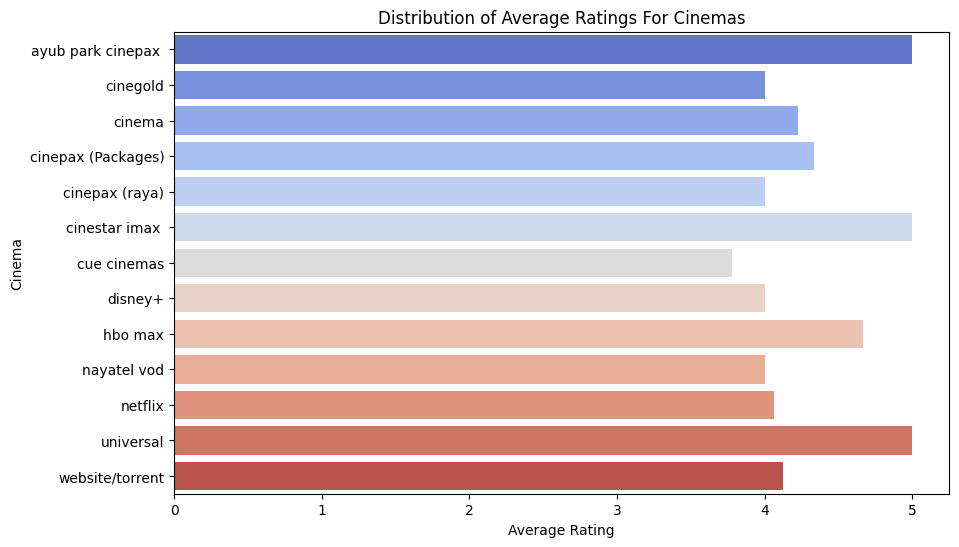

In [164]:
#now, we will see the ratings of the movies, grouped by their recent platforms
ratings = data.groupby(['Platform'])['Recent Rating'].mean().to_dict()
print(ratings)
ratings_keys_list = list(ratings.keys())
ratings_values = list(ratings.values())

data_temp = {'Rating': ratings_keys_list, 'Count': ratings_values}
df_temp = pd.DataFrame(data_temp)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Rating', data=df_temp, palette='coolwarm')

plt.xlabel('Average Rating')
plt.ylabel('Cinema')
plt.title('Distribution of Average Ratings For Cinemas')

plt.show()

**Observation 5:**
it seems from the given data, ayub park cinepax, cinestar imax, and universal seem to be the higest rated.

{'ayub park cinepax ': 5.0, 'cinegold': 4.0, 'cinema': 4.2272727272727275, 'cinepax (Packages)': 4.333333333333333, 'cinepax (raya)': 4.0, 'cinestar imax ': 5.0, 'cue cinemas': 3.7777777777777777, 'disney+': 4.0, 'hbo max': 4.666666666666667, 'nayatel vod': 4.0, 'netflix': 4.064516129032258, 'universal': 5.0, 'website/torrent': 4.126984126984127}


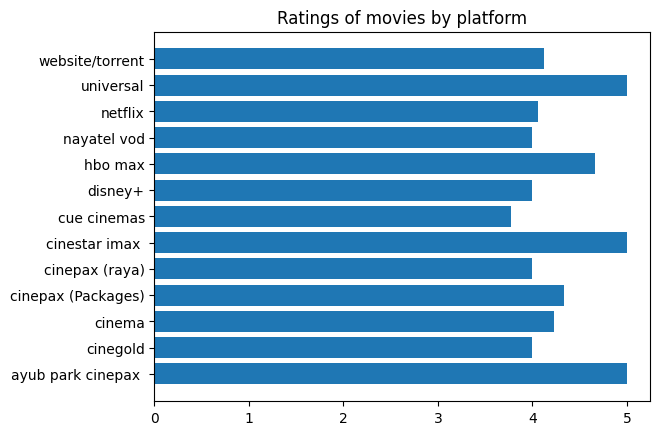

In [165]:
ratings = data.groupby(['Platform'])['Recent Rating'].mean().to_dict()
print(ratings)
rating_keys = list(ratings.keys())
plt.barh(rating_keys, ratings.values())
plt.title("Ratings of movies by platform")
plt.show()

**Let's see if the medium of watching a movie (online vs offline) influences how viewers rate it**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


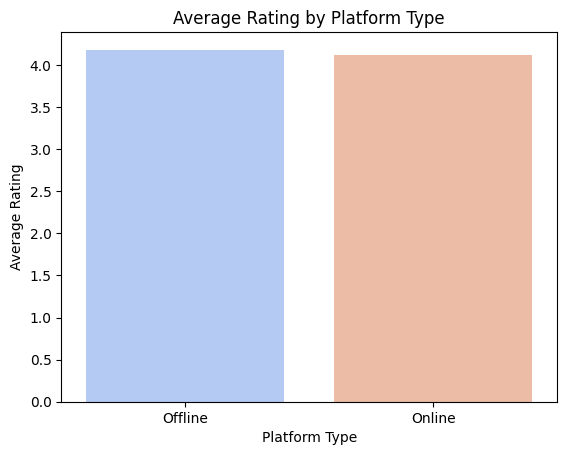

No significant difference found.


In [166]:
online_platforms = ['website/torrent', 'netflix', 'disney+', 'hbo max','nayatel vod']

offline_platforms = ['cinepax (Packages)' , 'cue cinemas', 'cinema', 'cinepax (raya)', 'universal', 'ayub park cinepax ','cinegold', 'cinestar imax ' ]


data['Platform_Type'] = data['Platform'].apply(lambda x: 'Online' if x in online_platforms else 'Offline')

sns.barplot(x = 'Platform_Type', y = 'Recent Rating', data = data, errorbar = None, palette = 'coolwarm')
plt.title('Average Rating by Platform Type')
plt.xlabel('Platform Type')
plt.ylabel('Average Rating')
plt.show()
print("No significant difference found.")

**Let's see if gender of the respondents has an association with the genre of the favourite or recently watched movies**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

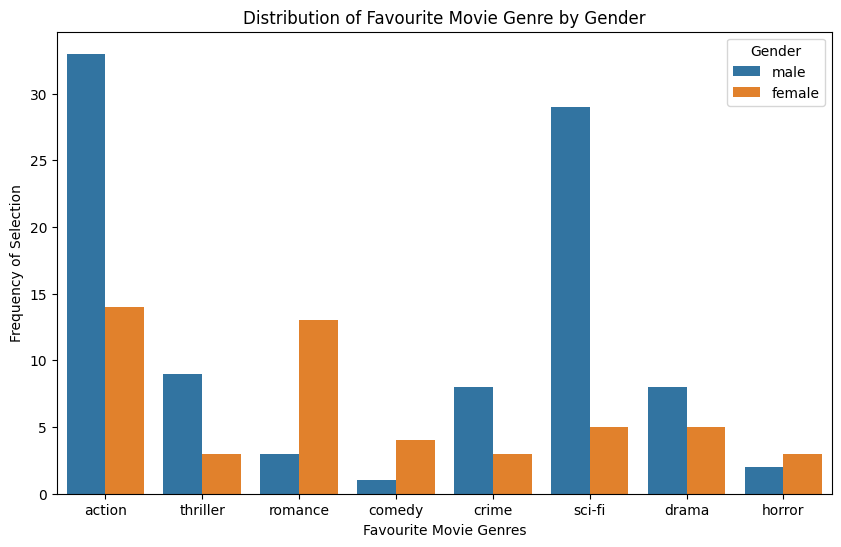

In [167]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'Favourite Movie Genre', hue = 'Gender', data = data)
plt.title('Distribution of Favourite Movie Genre by Gender')
plt.xlabel('Favourite Movie Genres')
plt.ylabel('Frequency of Selection')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

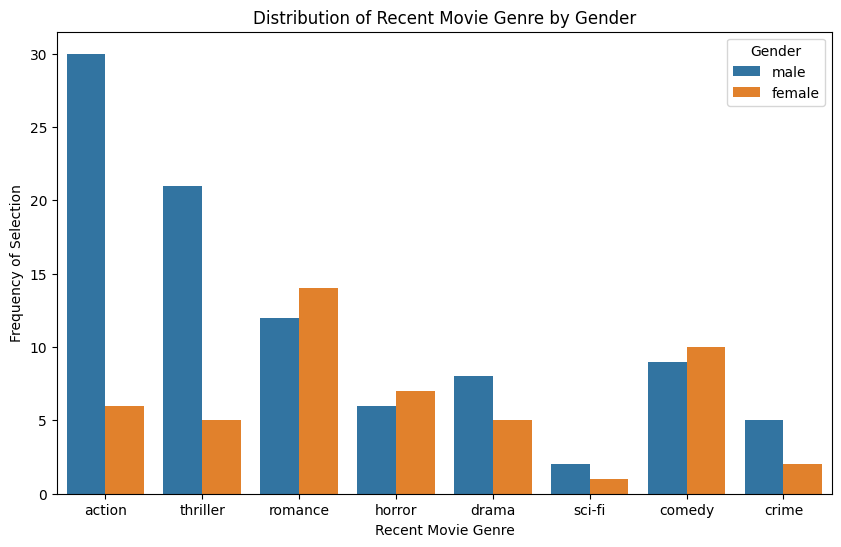

In [168]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Recent Movie Genre', hue='Gender', data=data)
plt.title('Distribution of Recent Movie Genre by Gender')
plt.xlabel('Recent Movie Genre')
plt.ylabel('Frequency of Selection')
plt.show()

**Lets see if respondents' gender influences their choice of favourite actor**

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

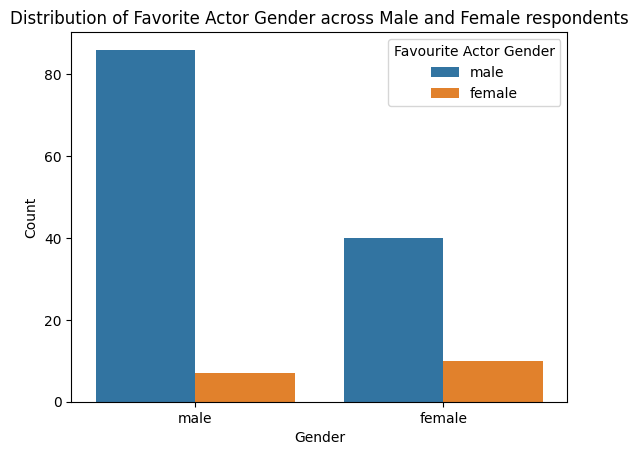

In [169]:
sns.countplot(x='Gender', hue='Favourite Actor Gender', data=data)

plt.title('Distribution of Favorite Actor Gender across Male and Female respondents')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

**Now checking how frequently various combinations of genres occur between the most Recently Watched Movie and Favorite Movie**

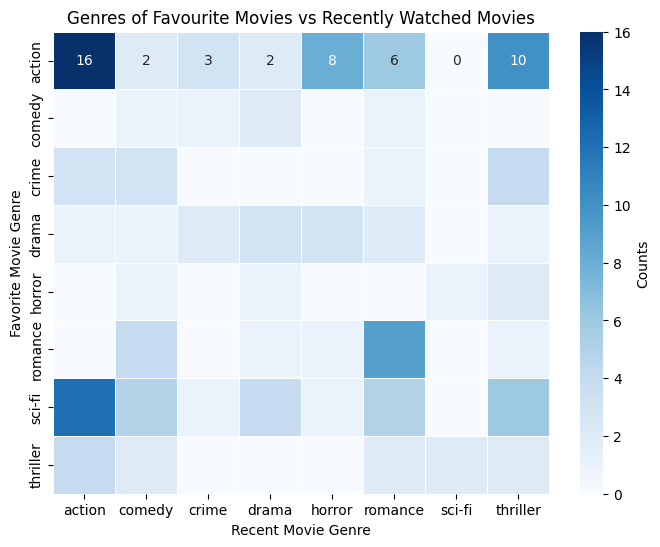

In [170]:
genre_matrix = pd.crosstab(data['Favourite Movie Genre'], data['Recent Movie Genre'])

plt.figure(figsize=(8, 6))
sns.heatmap(genre_matrix, annot=True, cmap='Blues', linewidths=.5, cbar_kws={'label': 'Counts'})

plt.title('Genres of Favourite Movies vs Recently Watched Movies')
plt.xlabel('Recent Movie Genre')
plt.ylabel('Favorite Movie Genre')

plt.show()

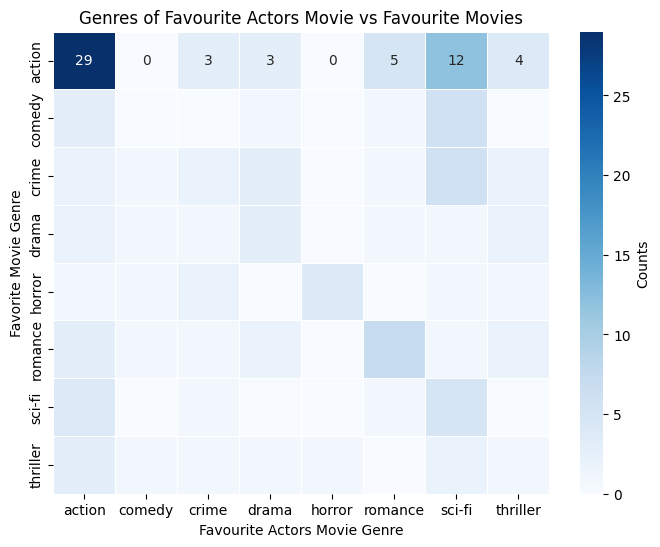

In [171]:
genre_matrix = pd.crosstab(data['Favourite Actor Movie Genre'], data['Favourite Movie Genre'])

plt.figure(figsize=(8, 6))
sns.heatmap(genre_matrix, annot=True, cmap='Blues', linewidths=.5, cbar_kws={'label': 'Counts'})

plt.title('Genres of Favourite Actor''s Movie vs Favourite Movies')
plt.xlabel('Favourite Actor''s Movie Genre')
plt.ylabel('Favorite Movie Genre')

plt.show()

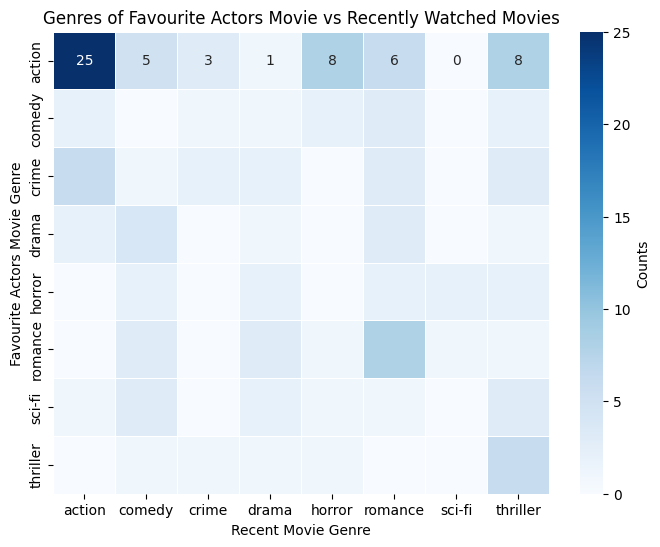

In [172]:
genre_matrix = pd.crosstab(data['Favourite Actor Movie Genre'], data['Recent Movie Genre'])

plt.figure(figsize=(8, 6))
sns.heatmap(genre_matrix, annot=True, cmap='Blues', linewidths=.5, cbar_kws={'label': 'Counts'})

plt.title('Genres of Favourite Actor''s Movie vs Recently Watched Movies')
plt.xlabel('Recent Movie Genre')
plt.ylabel('Favourite Actor''s Movie Genre')

plt.show()

In [173]:
data

,Education,Gender,Watches Hollywood Movies,Recently Watched,Platform,Recent Rating,Watch Again,Favourite Movie,Favourite Actor,Favourite Actor Gender,Favourite Actor Movie,Recent Movie Genre,Favourite Movie Genre,Favourite Actor Movie Genre,Platform_Type
0,university,male,yes,gran turismo,cinepax (Packages),4,no,avengers: endgame,robert downey jr.,male,avengers,action,action,action,Offline
1,university,male,yes,blue beetle,website/torrent,3,yes,shutter island,hugh jackman,male,wolverine,action,thriller,action,Online
2,university,male,yes,oppenhiemer,cue cinemas,4,yes,inception,tom cruise,male,vanilla sky,thriller,action,thriller,Offline
3,university,female,yes,a rainy day in newyork,website/torrent,4,yes,Avengers,tom hiddleston,male,i saw the light,romance,action,drama,Online
4,university,female,yes,exorcist,cinema,3,yes,10 things i hate about you,ryan reynolds,male,deadpool,horror,romance,action,Offline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,school (till matric/o-levels),female,yes,mission impossible 7,cinestar imax,5,yes,avengers end game,tom cruise,male,mission impossible 9,action,action,action,Offline
150,not a student,male,yes,the ugly truth,netflix,5,yes,the proposal,kate winslet,female,titanic,romance,romance,romance,Online
151,university,male,yes,the whale,website/torrent,4,yes,fight club,colin farrell,male,the lobster,drama,action,romance,Online
152,university,female,yes,remember me,website/torrent,3,yes,jurassic park,keeanu reeves,male,john wick 4,romance,action,action,Online




**CAUSAL INFERENCE:**

In [174]:
df = data

platform_ratings = df.groupby('Platform_Type')['Recent Rating'].mean()
ate = platform_ratings['Offline'] - platform_ratings['Online']

print(f"ATE of Platform (Offline vs Online) on Rating: {ate}")

gender_types = df['Gender'].unique()

ate_by_gender = {}
for gender in gender_types:

    gender_data = df[df['Gender'] == gender]
    
    platform_ratings = gender_data.groupby('Platform_Type')['Recent Rating'].mean()
    
    ate_by_gender[gender] = platform_ratings['Offline'] - platform_ratings['Online']

overall_ate = sum(ate_by_gender.values()) / len(ate_by_gender)

print(f"Overall ATE of Platform (Offline vs Online) on Rating after conditioning on gender: {overall_ate}")

platform_types = df['Platform_Type'].unique()

ate_by_platform = {}

for platform in platform_types:

    platform_data = df[df['Platform_Type'] == platform]
    
    watch_again_proportion = platform_data['Watch Again'].value_counts(normalize=True).get('yes', 0)
    
    ate_by_platform[platform] = watch_again_proportion

overall_ate = ate_by_platform['Offline'] - ate_by_platform['Online']

print(f"Overall ATE of Platform (Offline vs Online) on 'Watch Again' proportion: {overall_ate}")

ATE of Platform (Offline vs Online) on Rating: 0.06060606060606055
Overall ATE of Platform (Offline vs Online) on Rating after conditioning on gender: 0.056294440853264405
Overall ATE of Platform (Offline vs Online) on 'Watch Again' proportion: -0.09848484848484851


The above results show that individuals that watch movies via an offline platform tend to give a higher overall movie rating than individuals who consume movies via an online platform.
This observation changes slightly when we condition on gender, meaning that gender can be considered a confounding variable (although minor), when evaluating the overall effect of the media platform on the individual's rating of the movie.

We also found the effect of the media platform on whether an individual would want to watch the film again or more precisely, a movie of a similar genre.
Since this effect came out to be negative, it implies that movies consumed through an offline platform have the movie-consumers 'wanting less' in contrast to if they watched the movie through an online platform. This is to be expected as normally people would not watch a movie again in a cinema when they can just watch it online.

**STATISTICAL INFERENCE AND HYPOTHESIS TESTING**


In [175]:
from scipy import stats

offline_ratings = df[df['Platform_Type'] == 'Offline']['Recent Rating']
online_ratings = df[df['Platform_Type'] == 'Online']['Recent Rating']

t_stat, p_value = stats.ttest_ind(offline_ratings, online_ratings, equal_var=False)  


print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference in ratings between Offline and Online platforms.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in ratings between Offline and Online platforms.")


T-Statistic: 0.40369558422409574
P-Value: 0.687338661051538
Fail to reject null hypothesis: There is no significant difference in ratings between Offline and Online platforms.


A followup from our previous causal inference, we now determine if there is a difference between the ratings of movies consumed through the two types of platforms.
Since this is numerical data, we learnt during our course that a simple p-value testing should be sufficient to implement our hypothesis testing.

We set the significance level to 5% (common practice), and set the null hypothesis such that:
"There is no significant difference between the ratings of movies consumed through Offline Platforms and Online Platforms".

We set our hypothesis as the opposite:
"There is a difference between the ratings of movies consumed through the two types of platforms, and this difference is statistically significant."

Our findings show that the t-statistic is a meagre 0.403 and the p-value being 0.687, well beyond our significance level.
Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference between the ratings of movies consumed through the two types of platforms.

In [186]:
import pandas as pd
from scipy.stats import chi2_contingency

data = df

contingency_table = pd.crosstab(data['Recent Movie Genre'], data['Favourite Movie Genre'])

# Chi-Square test to find effect across categorical data.
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}, p-value: {p}")

# analysing the effect across genders.

data_male = data[data['Gender'] == 'male']
data_female = data[data['Gender'] == 'female']

# Chi-Square test for males
contingency_table_male = pd.crosstab(data_male['Recent Movie Genre'], data_male['Favourite Movie Genre'])
chi2_male, p_male, _, _ = chi2_contingency(contingency_table_male)
print(f"Male: Chi-Square statistic: {chi2_male}, p-value: {p_male}")

# Chi-Square test for females
contingency_table_female = pd.crosstab(data_female['Recent Movie Genre'], data_female['Favourite Movie Genre'])
chi2_female, p_female, _, _ = chi2_contingency(contingency_table_female)
print(f"Female: Chi-Square statistic: {chi2_female}, p-value: {p_female}")


Chi-Square statistic: 93.34746449048126, p-value: 0.00013823484663456323
Male: Chi-Square statistic: 76.89669519497106, p-value: 0.0066403693943372965
Female: Chi-Square statistic: 70.85753532182105, p-value: 0.022193783190737924


**MACHINE LEARNING MODEL**

Our main goal is to create a recommender model that takes in a Movie Name, and tries to predict its genre.
Once a genre is predicted, we recommend high-rated films of the same genre.
Our dataset collection also collected reviews on the films that surveyees entered.

Our First Model is a Random Forest Model where we use our existing data set to create the Training and Test Datasets.
The split is 80-20 for the train-test sets.
The accuracy achieved is 73%, which is satisfactory given that we have a smaller dataset to work upon.

It is also noteworthy that our dataset has a bias towards the "Action" genre and most entries in the dataset are of this genre.
This is why the accuracy is good here.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import re

df = data
df["Favourite Movie"] = df["Favourite Movie"].apply(lambda x: x.lower())

# splitting the data into training and testing sets (80-20 split).

X = df['Favourite Movie']  # Input: Movie names
X = X.append(df["Recently Watched"])
X = X.append(df["Favourite Actor Movie"])

y = df["Favourite Movie Genre"]  # Output: Movie genres
y = y.append(df["Recent Movie Genre"])
y = y.append(df["Favourite Actor Movie Genre"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# vectorizing the text data using TF-IDF (Term Frequency-Inverse Document Frequency)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators = 200, random_state = 40)
rf_model.fit(X_train_tfidf, y_train)

# predicting on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# evaluating the Random Forest model
print("\n\n")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest: {accuracy_rf:.2f}")


movie_titles = ["Interstellar", "Oppenheimer", "Avengers: Infinity War", "The Twilight Saga: Breaking Dawn - Part 1", "The Shawshank Redemption", "Scream", "Barbie", "Doctor Strange"]

for title in movie_titles:
    movie_title = pd.Series(title).apply(lambda x: x.lower())
    movie_title_tfidf = tfidf_vectorizer.transform(movie_title)
    predicted_genre = rf_model.predict(movie_title_tfidf)
    print("Title:", title, "-> Predicted Genre:", predicted_genre[0])

    predicted_genre = predicted_genre[0]
    predicted_genre_movies = df[df["Favourite Movie Genre"] == predicted_genre].copy()

    # Remove duplicates from the dataset after normalizing movie titles
    predicted_genre_movies["Favourite Movie"] = predicted_genre_movies["Favourite Movie"].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
    predicted_genre_movies = predicted_genre_movies.drop_duplicates(subset='Favourite Movie')

    # Ensure uniqueness and print 5 random movies from the filtered dataset
    print("Random Movies of Predicted Genre:")
    selected_movies = set()

    while len(selected_movies) < 5:
        random_movie = predicted_genre_movies.sample(1)
        movie_title = random_movie['Favourite Movie'].values[0]

        # Check for uniqueness
        if movie_title not in selected_movies:
            selected_movies.add(movie_title)
            genre = random_movie['Favourite Movie Genre'].values[0]
            print(f"Movie: {movie_title.upper()}, Genre: {genre}")
    print("\n")


Our second attempt at a model is another Random Forest Model where we use our existing data set and another dataset "movies.csv" that we scraped off the internet, to create the Training and Test Datasets.
This dataset comprises majorly of movies of the genres "Romance", "Comedy" and "Drama".
The split is 80-20 for the train-test sets.
The accuracy achieved is 59%, which is satisfactory given that we have a smaller dataset to work upon.

It is also noteworthy that our dataset has a bias towards the "Action" genre and most entries in the dataset are of this genre.
The test data set is hence, comprising majorly of "Action" genre films, whereas the additional dataset we added did not have "Action" Films.
This is why the accuracy falls, but should predict genres for any new films tested.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df = data
df2 = pd.read_csv("movies.csv")

df["Favourite Movie"] = df["Favourite Movie"].apply(lambda x: x.lower())
df2["Film"] = df2["Film"].apply(lambda x: x.lower())
df2["Genre"] = df2["Genre"].apply(lambda x: x.lower())

# splitting the data into training and testing sets

X = df['Favourite Movie']  # Input: Movie names
X = X.append(df["Recently Watched"])
X = X.append(df["Favourite Actor Movie"])
X = X.append(df2["Film"])


y = df["Favourite Movie Genre"]  # Output: Movie genres
y = y.append(df["Recent Movie Genre"])
y = y.append(df["Favourite Actor Movie Genre"])
y = y.append(df2["Genre"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# vectorizing the text data using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=40)
rf_model.fit(X_train_tfidf, y_train)

# predicting on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest: {accuracy_rf:.2f}")

movie_title = pd.Series(["interstellar"]).apply(lambda x: x.lower())
movie_title_tfidf = tfidf_vectorizer.transform(movie_title)
predicted_genre = rf_model.predict(movie_title_tfidf)
print(f"Predicted Genre: {predicted_genre}")


Our third Model is a Neural Network Model where we use our existing data set to create the Training and Test Datasets.
The split is 80-20 for the train-test sets.
The accuracy achieved is 74.4%, which is satisfactory given that we have a smaller dataset to work upon.

It is also noteworthy that our dataset has a bias towards the "Action" genre and most entries in the dataset are of this genre.
This is why the accuracy is good here.

However, since this model was not taught in our course, we have just shown this as an attempt to improve the accuracy given the current dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df = data
df["Favourite Movie"] = df["Favourite Movie"].apply(lambda x: x.lower())

# splitting the data into training and testing sets

X = df['Favourite Movie']  # Input: Movie names
X = X.append(df["Recently Watched"])
X = X.append(df["Favourite Actor Movie"])

y = df["Favourite Movie Genre"]  # Output: Movie genres
y = y.append(df["Recent Movie Genre"])
y = y.append(df["Favourite Actor Movie Genre"])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorizing the text data using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

tf.random.set_seed(10)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(383, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(12, activation="softmax")
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(X_train_tfidf, y_train, epochs=30)
model.evaluate(X_test_tfidf,  y_test, verbose=2)

Our fourth attempt at a model is another Neural Network Model where we use our existing data set and another dataset "movies.csv" that we scraped off the internet, to create the Training and Test Datasets.
This dataset comprises majorly of movies of the genres "Romance", "Comedy" and "Drama".
The split is 80-20 for the train-test sets.
The accuracy achieved is 68.7%, a significant increase from the Random Forest Model but one which is satisfactory given that we have a smaller dataset to work upon.

It is also noteworthy that our dataset has a bias towards the "Action" genre and most entries in the dataset are of this genre.
The test data set is hence, comprising majorly of "Action" genre films, whereas the additional dataset we added did not have "Action" Films.
This is why the accuracy falls, but should predict genres for any new films tested.

However, since this model was not taught in our course, we have just shown this as an attempt to improve the accuracy given the current dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

df = data
df2 = pd.read_csv("movies.csv")

df["Favourite Movie"] = df["Favourite Movie"].apply(lambda x: x.lower())
df2["Film"] = df2["Film"].apply(lambda x: x.lower())
df2["Genre"] = df2["Genre"].apply(lambda x: x.lower())

# splitting the data into training and testing sets

X = df['Favourite Movie']  # Input: Movie names
X = X.append(df["Recently Watched"])
X = X.append(df["Favourite Actor Movie"])
X = X.append(df2["Film"])

y = df["Favourite Movie Genre"]  # Output: Movie genres
y = y.append(df["Recent Movie Genre"])
y = y.append(df["Favourite Actor Movie Genre"])
y = y.append(df2["Genre"])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# vectorizing the text data using TF-IDF (Term Frequency-Inverse Document Frequency)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

tf.random.set_seed(10)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(383, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(12, activation="softmax")
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(X_train_tfidf, y_train, epochs=30)
model.evaluate(X_test_tfidf,  y_test, verbose=2)